# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [126]:
import pandas as pd

In [127]:
# Your code here. 
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data
student_data.head()

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

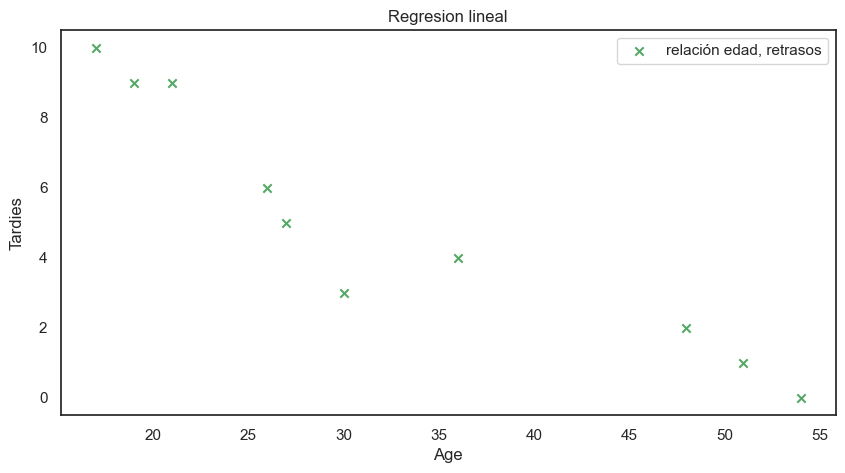

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as plt

x=np.linspace(student_data.X.min(), student_data.Y.max(), 50)

plt.figure(figsize=(10, 5))


# datos
plt.scatter(student_data.X, student_data.Y, marker='x', c='g', label='relación edad, retrasos')

plt.title('Regresion lineal')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show();

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [129]:
# Your response here. 
df = student_data.copy()
df.corr().iloc[0,1], df.cov().iloc[0,1]

(-0.9391626886887121, -45.56666666666667)

In [ ]:
#Se puede decir que si existe una fuerte tendencia a que los alumnos de mayor edad suelen llegar menos veces tarde

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

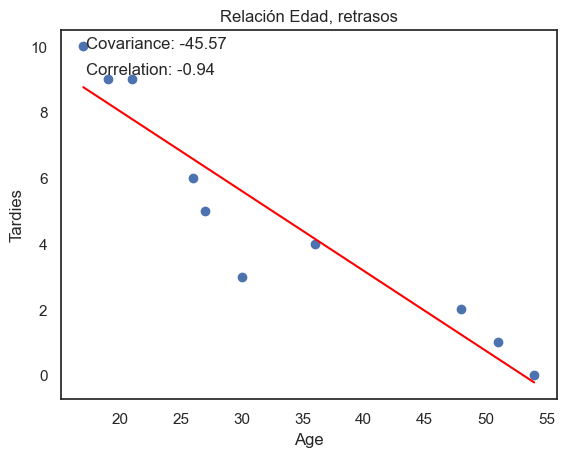

In [130]:
# Your response here.
covariance = np.cov(x_values, y_values)[0, 1]
correlation = np.corrcoef(x_values, y_values)[0, 1]


plt.scatter(x_values, y_values)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Relación Edad, retrasos')

# Add regression line
plt.plot(np.unique(x_values), np.poly1d(np.polyfit(x_values, y_values, 1))(np.unique(x_values)), color='red')

# Add text annotation for covariance and correlation
plt.annotate(f'Covariance: {covariance:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.88), xycoords='axes fraction')

plt.show()



Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [131]:
# Your response here.
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score as r2




X = df.drop(columns='Y')
y = df.drop(columns='X')

LR = LinReg()

LR.fit(X,y)
LR.score(X, y)


0.8820265558250109

Plot your regression model on your scatter plot.

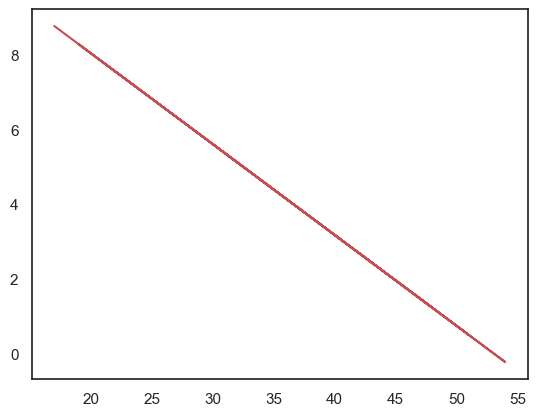

In [132]:
# your code hereplt.scatter(student_data['X'], student_data['Y'])
plt.plot(student_data['X'], predictions, c='r')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

El modelo de predición es prácticamente igual al observado en la correlación.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [133]:
# Import any libraries you may need & the data
vehi = pd.read_csv('vehicles.csv')
vehi.head(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [134]:
# Your response here. 
correlations = vehi.corr()['CO2 Emission Grams/Mile']

print(correlations)

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64


C:\Users\cleme\AppData\Local\Temp\ipykernel_4388\3467571217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = vehi.corr()['CO2 Emission Grams/Mile']


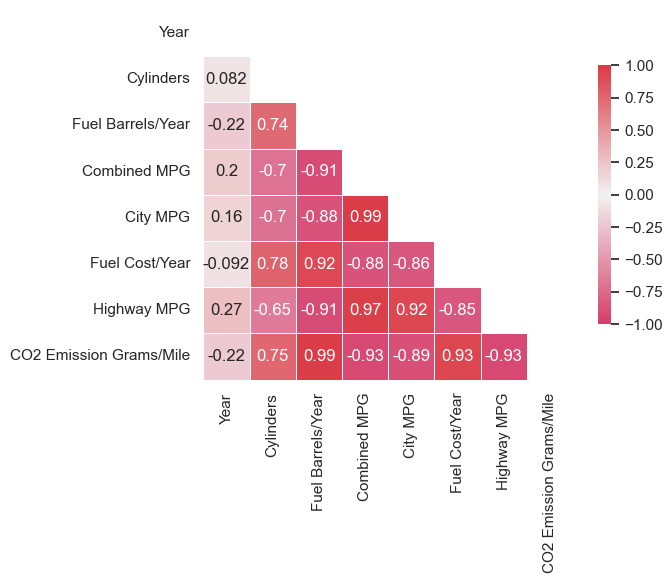

In [135]:
import seaborn as sns
X_y = auto[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','City MPG','Fuel Cost/Year','Highway MPG','CO2 Emission Grams/Mile']]

corr=X_y.corr(method='pearson')


sns.set(style='white')                           

mascara=np.triu(np.ones_like(corr, dtype=bool))   

cmap=sns.diverging_palette(0, 10, as_cmap=True)   


sns.heatmap(corr,            
            mask=mascara,    
            cmap=cmap,       
            vmax=1,         
            vmin=-1,         
            center=0,         
            square=True,      
            linewidth=0.5,    
            
            cbar_kws={'shrink': 0.7},  
            annot=True );                
           

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [136]:
vehi.drop(columns=['City MPG','Year', 'Highway MPG', 'Combined MPG'], inplace=True)




In [137]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import mean_squared_error as mse

from sklearn.linear_model import LogisticRegression as LogReg# random forest
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8)
X_train=StandardScaler().fit_transform(X_train)

X_test=StandardScaler().fit_transform(X_test)
y_test.mean(), y_test.std()
rfr = RFR(n_estimators=2000).fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse(y_test, y_pred, squared=False)



C:\Users\cleme\AppData\Local\Temp\ipykernel_4388\2555572041.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr = RFR(n_estimators=2000).fit(X_train, y_train)


0.9820736352229398

In [138]:
# Your response here. 
# Existe una diferencia apreciable entreel valor predicho y el valos de test, habría que entrenar con menos columnas, aunque no parece lo apropiado

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

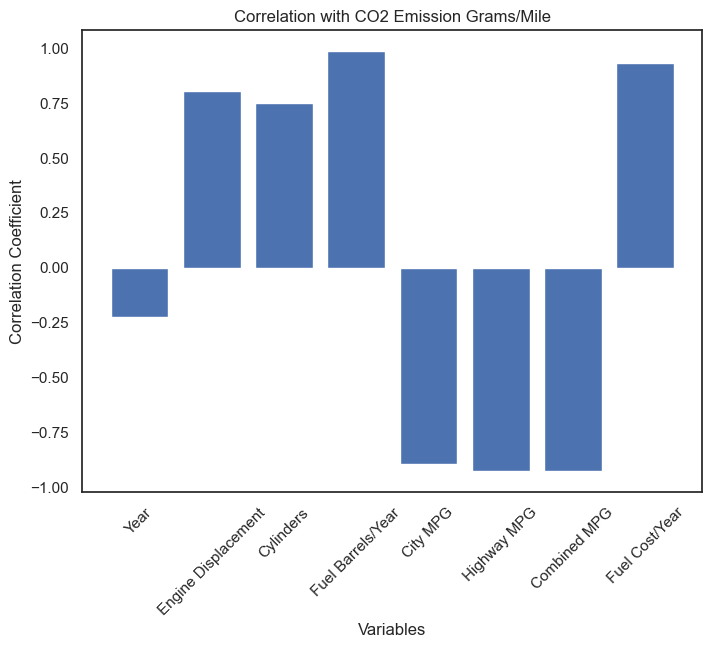

In [139]:
# Your response here. 
import matplotlib.pyplot as plt

# Define the variables and their correlation coefficients
variables = ["Year", "Engine Displacement", "Cylinders", "Fuel Barrels/Year", "City MPG", "Highway MPG", "Combined MPG", "Fuel Cost/Year"]
correlations = [-0.222300, 0.803520, 0.752393, 0.986189, -0.894139, -0.926405, -0.926229, 0.930865]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(variables, correlations)
plt.xlabel("Variables")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation with CO2 Emission Grams/Mile")
plt.xticks(rotation=45)
plt.show()

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [140]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [141]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [142]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [143]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [144]:
# Your response here. 